<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 2: Sistemas Multi Qubits</font></td>
    </tr>
</table>

<p style="text-align:right; font-weight:bold;">Autora: Claudia Zendejas-Morales</p>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

## Contenido

1. [Sistemas con más de un Qubit](#1)
   1. [Estados multi-qubit](#1.1)
   2. [Compuertas de un qubit en estados multi-qubit](#1.2)
   3. [Compuertas de dos qubits](#1.3)
      1. [Compuerta $CNOT$ o $CX$](#1.3.1)
      2. [Compuertas controladas](#1.3.2)
      3. [Compuerta $SWAP$](#1.3.3)
   4. [Compuertas de más qubits](#1.4)
      1. [Compuerta Toffoli , $CCNOT$ o $CCX$](#1.4.1)
      2. [Compuerta Fredkin o $CSWAP$](#1.4.2)
      3. [Compuerta controlada personaliza](#1.4.3)
2. [Estados de Bell: Entrelazamiento](#2)
3. [QSphere, otra forma de visualizar estados multi-qubit](#3)
4. [Simular Circuitos Cuánticos](#4)
      1. [Primitivas de Qiskit Runtime](#4.1)
          1. [Primitiva Sampler](#4.1.1)
          2. [Primitiva Estimator](#4.1.2)
5. [Errores y cómo corregirlos](#5)
   1. [Mitigación de errores](#5.1)
   2. [Corrección de errores](#5.2)
   3. [Diferencias](#5.3)
6. [Ejemplos en las SpinQ](#6)
   1. [Simulación con SpinQit](#6.1)
   2. [Ejecución en las SpinQ](#6.2)
7. [Práctica 2](#7)

<a id="1"></a>
## 1. Sistemas con más de un Qubit

Hemos visto algunos efectos interesantes con qubits individuales y compuertas de un qubit, pero el verdadero poder de la computación cuántica se realiza a través de las interacciones entre qubits. En este notebook, presentaremos compuertas de múltiples qubits y exploraremos comportamientos interesantes de los sistemas multi-qubit.

Por lo general, las compuertas que se pueden implementar directamente en el hardware actuarán solo en uno o dos qubits. En nuestros circuitos, podemos querer usar compuertas complejas que actúen sobre una gran cantidad de qubits. Afortunadamente, esto no será un problema. Con las compuertas de uno y dos qubits que nos proporciona el hardware, es posible construir cualquier otra compuerta.

<a id="1.1"></a>
## 1.1. Estados multi-qubit

La dimensión del espacio de Hilbert para $n$ qubits está dado por $2^n$. Para obtenerlo se usa el **producto tensorial** (o *[producto de Kronecker](https://en.wikipedia.org/wiki/Kronecker_product)*).

### Recordatorio: Producto tensorial

El producto tensorial, denotado por $\otimes$, se puede aplicar a vectores y matrices (en general a [tensores](https://en.wikipedia.org/wiki/Tensor)). Actúa como sigue,

$$\vec{a}\otimes\vec{b}=\mymatrix{r}{ a_1 \\ a_2 }\otimes\mymatrix{r}{ b_1 \\ b_2 }=\mymatrix{r}{ a_1\mymatrix{r}{ b_1 \\ b_2 } \\ a_2\mymatrix{r}{ b_1 \\ b_2 } }=\mymatrix{r}{ a_1b_1 \\ a_1b_2 \\ a_2b_1 \\ a_2b_2 }$$

$$C\otimes D=\mymatrix{r}{ c_{11} & c_{12} \\ c_{21} & c_{22} }\otimes\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} }=\mymatrix{r}{ c_{11}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } & c_{12}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } \\ c_{21}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } & c_{22}\mymatrix{r}{ d_{11} & d_{12} \\ d_{21} & d_{22} } }=\mymatrix{r}{ c_{11}d_{11} & c_{11}d_{12} & c_{12}d_{11} & c_{12}d_{12} \\ c_{11}d_{21} & c_{11}d_{22} & c_{12}d_{21} & c_{12}d_{22} \\ c_{21}d_{11} & c_{21}d_{12} & c_{22}d_{11} & c_{22}d_{12} \\ c_{21}d_{21} & c_{21}d_{22} & c_{22}d_{21} & c_{22}d_{22}}$$

### El espacio de 2 qubits

El espacio de Hilbert de un estado cuántico formado por dos qubits, $n=2$, tendrá una dimensión de $2^2=4$. Por ejemplo, el estado formado por dos qubits, cada uno en $\ket{0}$ es,

$$\ket{0}\otimes\ket{0}=\ket{00}=\mymatrix{r}{ 1 \\ 0 }\otimes\mymatrix{r}{ 1 \\ 0 }=\mymatrix{r}{ 1\mymatrix{r}{ 1 \\ 0 } \\ 0\mymatrix{r}{ 1 \\ 0 } }=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 }$$

Ahora, considerando todas las posibles combinaciones de los estados base para cada uno de los dos qubits, tenemos que,

$$\ket{0}\otimes\ket{0}=\ket{00}=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 }$$

$$\ket{0}\otimes\ket{1}=\ket{01}=\mymatrix{r}{ 0 \\ 1 \\ 0 \\ 0 }$$

$$\ket{1}\otimes\ket{0}=\ket{10}=\mymatrix{r}{ 0 \\ 0 \\ 1 \\ 0 }$$

$$\ket{1}\otimes\ket{1}=\ket{11}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 1 }$$

Notemos que debido a que estamos usando la *base computacional* para los qubits, podemos tener una relación directa con la representación de los números decimales en binario; es decir, el estado $\ket{00}$ tiene un $1$ en la posición $0$ del vector de estado de cuatro elementos, el estado $\ket{10}$ tienen un $1$ en la posición $2$ (contando desde cero), pues se cumple que $10_{binario} = 2_{decimal}$.


### El espacio de 3 qubits

Para el caso de $n=3$, tenemos que la dimensión es $2^3=8$, entonces los vectores de estado para este espacio de Hilbert, en la base computacional, serían:

$$\ket{000}=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{001}=\mymatrix{r}{ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{010}=\mymatrix{r}{ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{011}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 }$$

$$\ket{100}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 }, ~~~~ \ket{101}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 }, ~~~~ \ket{110}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 }, ~~~~ \ket{111}=\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 }$$

<a id="1.2"></a>
## 1.2. Compuertas de un qubit en estados multi-qubit

Las compuertas de un solo qubit que actúan en estados multi-qubit, deben tener la dimension correcta para poder efectuar la multiplicación matriz por vector.

Si por ejemplo tenemos esto: $H\ket{q_1q_0}$, no se puede saber a cual de los dos qubits se le debe aplicar la compuerta $H$ si a $\ket{q_1}$ o a $\ket{q_0}$, entonces se debe ser explícito. Si lo que se desea es aplicar $H$ al $\ket{q_0}$ se debe escribir:

$$I\otimes H \; \ket{q_1q_0}$$

Lo que implica que se aplicará la compuerta *identidad* al $\ket{q_1}$, es decir, no será afectado.

La compuerta $I\otimes H$ a aplicar al estado de 2 qubits es:

$$I\otimes H=\mymatrix{r}{ 1 & 0 \\ 0 & 1 }\otimes\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}=\mymatrix{r}{ 1\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 0\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} \\ 0\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 1\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} }=\mymatrix{rrrr}{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\ 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} }$$

En Qiskit podemos usar la clase `Operator` para obtener el operador equivalente a las compuertas agregadas a un circuito, veamos le ejemplo anterior:

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(2) # circuito con 2 qubits

circuit.h(0)    # Hadamard en q0
circuit.id(1)   # Identidad en q1

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

display(plot_bloch_multivector(psi))

Ejemplo con $3$ qubits $\ket{q_2 \, q_1 \, q_0}$:

$$H\otimes R_y(3\pi/5) \otimes R_x(\pi/4) \; \ket{000}$$

In [ ]:
import numpy as np

circuit = QuantumCircuit(3) # circuito con 3 qubits

circuit.rx(np.pi/4, 0)      # Rx de pi/4  al q0
circuit.ry(3*np.pi/5, 1)    # Ry de 3pi/5 al q1
circuit.h(2)                # Hadamard al q2

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

print()
display(plot_bloch_multivector(psi))

**Nota**: Si se aplica la misma compuerta a todos los qubits de un estado, se puede indicar con un subíndice, como por ejemplo, la compuerta $H_2=H\otimes H$ es aplicada a dos qubits: $H_2 \, \ket{00}=H\otimes H \, \ket{0}\otimes\ket{0}$ y de la misma manera, se tiene que,

$$H_n \, \underbrace{\ket{0...0}}_{n~qubits}=\underbrace{H\otimes\cdots\otimes H}_{n~Hadamards} \, \underbrace{\ket{0...0}}_{n~qubits}$$

Notaciones usadas:

$$\underbrace{H\otimes\cdots\otimes H}_{n~veces}=\bigotimes_1^n H=H^{\otimes n}=H_n$$

<a id="1.3"></a>
## 1.3. Compuertas de dos qubits

Ahora que ya sabemos cómo son los estados multi-qubit, podemos revisar las compuertas que son aplicadas a más de un qubit. Primero veamos algunas compuertas que necesitan dos qubits para operar.

<a id="1.3.1"></a>
### 1.3.1. Compuerta $CNOT$ o $CX$

Se trata de una compuerta controlada, actúa sobre dos qubits, en donde uno de ellos sirve como control y el otro como el objetivo. Se aplicará una operación $NOT$ o $X$ en el qubit objetivo, solo cuando el qubit control sea $\ket{1}$ y si no lo es, entonces el qubit objetivo permance sin cambio, por lo que, si el qubit de la izquierda ($\ket{q_1}$) es el control y el de la derecha ($\ket{q_0}$) es el objetivo, en el estado $\ket{q_1q_0}$, las transiciones son:

$$CNOT_{1,0}\ket{00}=\ket{00}$$
$$CNOT_{1,0}\ket{01}=\ket{01}$$
$$CNOT_{1,0}\ket{10}=\ket{11}$$
$$CNOT_{1,0}\ket{11}=\ket{10}$$

donde los subíndices en $CNOT$ indican el qubit control y el objetivo, en ese orden.

Dado esto, podríamos tener otra versión del $CNOT$ en donde el qubit control sea $q_0$ y el objetivo sea $q_1$, las transiciones para este caso serían,

$$CNOT_{0,1}\ket{00}=\ket{00}$$
$$CNOT_{0,1}\ket{01}=\ket{11}$$
$$CNOT_{0,1}\ket{10}=\ket{10}$$
$$CNOT_{0,1}\ket{11}=\ket{01}$$

El order predeterminado en la mayoría de las referencias es que el qubit de la izquierda es el control, mientras que el de la derecha es el objetivo.

Conociendo la definición de la compuerta y las transiciones, podemos obtener la matriz que representa a la operación $CNOT$:

<table width='50%'>

<tr>
<td style='width:50%; text-align: center'><strong>Transiciones</strong></td>
<td style='width:50%; text-align: center'><strong>Matriz</strong></td>
</tr>

<tr>
<td style='width:50%; text-align: center'>
Compuerta $CNOT_{1,0}$:

$$\ket{00}\rightarrow\ket{00}$$
$$\ket{01}\rightarrow\ket{01}$$
$$\ket{10}\rightarrow\ket{11}$$
$$\ket{11}\rightarrow\ket{10}$$
</td>
<td style='width:50%; text-align: center'>
$
\begin{array}{c|cc} \hookleftarrow & \ket{00} & \ket{01} & \ket{10} & \ket{11} \\ \hline 
    \ket{00} & 1 & 0 & 0 & 0 \\ 
    \ket{01} & 0 & 1 & 0 & 0 \\ 
    \ket{10} & 0 & 0 & 0 & 1 \\ 
    \ket{11} & 0 & 0 & 1 & 0 \end{array}
$
</td>
</tr>

<tr>
<td style='width:50%; text-align: center'>
Compuerta $CNOT_{0,1}$:

$$\ket{00}\rightarrow\ket{00}$$
$$\ket{01}\rightarrow\ket{11}$$
$$\ket{10}\rightarrow\ket{10}$$
$$\ket{11}\rightarrow\ket{01}$$
</td>
<td style='width:50%; text-align: center'>
$
\begin{array}{c|cc} \hookleftarrow & \ket{00} & \ket{01} & \ket{10} & \ket{11} \\ \hline 
    \ket{00} & 1 & 0 & 0 & 0 \\ 
    \ket{01} & 0 & 0 & 0 & 1 \\ 
    \ket{10} & 0 & 0 & 1 & 0 \\ 
    \ket{11} & 0 & 1 & 0 & 0 \end{array}
$
</td>
</tr>

</table>

En Qiskit se cuenta con el método `cx(c, t)`, que recibe el qubit de control como primer parámetro y el qubit objetivo como segundo parámetro.

In [ ]:
circ7 = QuantumCircuit(2)   # circuito con 2 qubits

circ7.x(0)                  # ponemos el control en |1> para que la compuerta sea aplicada

circ7.cx(0, 1)              # CNOT con q0 como control y q1 como objetivo

print("Este es el caso para CNOT(0,1)|01> = |11>")

display(circ7.draw('mpl'))

op = Operator(circ7)
display(array_to_latex(op))

psi = Statevector(circ7)

print()
display(plot_bloch_multivector(psi))

In [ ]:
circ8 = QuantumCircuit(2)   # circuito con 2 qubits

circ8.x(1)                  # ponemos el control en |1> para que la compuerta sea aplicada

circ8.cx(1, 0)              # CNOT con q1 como control y q0 como objetivo

print("Este es el caso para CNOT(1,0)|10> = |11>")

display(circ8.draw('mpl'))

op = Operator(circ8)
display(array_to_latex(op))

psi = Statevector(circ8)

print()
display(plot_bloch_multivector(psi))

<a id="1.3.2"></a>
### 1.3.2. Compuertas controladas

Así como podemos controlar si aplicar la compuerta $X$ de acuerdo al estado de un qubit control, podemos controlar cualquier otra compuerta. Si tenemos la compuerta $U$, su versión controlada sería $CU$, y podemos decidir cual qubit es el control y cual es el objetivo (como para el caso de $CNOT$).

Una operación unitaria en general la podemos escribir como,

$$U=\mymatrix{rr}{ u_{11} & u_{12} \\ u_{21} & u_{22} }$$

Entonces su versión controlada $CU$, si el control es el qubit de la izquierda ($\ket{q_1}$), tendría las transiciones:

$CU_{1,0}\ket{00}=\ket{00}$

$CU_{1,0}\ket{01}=\ket{01}$

$CU_{1,0}\ket{10}=\ket{1}\otimes U\ket{0}=\ket{1}\otimes \left(u_{11}\ket{0}+u_{21}\ket{1}\right)$

$CU_{1,0}\ket{11}=\ket{1}\otimes U\ket{0}=\ket{1}\otimes \left(u_{12}\ket{0}+u_{22}\ket{1}\right)$

Su forma matricial es,

$$CU=\mymatrix{rrrr}{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & u_{11} & u_{12} \\ 0 & 0 & u_{21} & u_{22} }$$

En Qiskit existen varias compuertas controladas predefinidas, en el siguiente código se usarán algunas a modo de ejemplo:

In [ ]:
circ9 = QuantumCircuit(2)    # circuito con 2 qubits

circ9.cy(0, 1)               # Y controlada, qubit control es q0, y objetivo es q1
circ9.cz(1, 0)               # Z controlada, qubit control es q1, y objetivo es q0
circ9.cx(0, 1)               # X controlada, qubit control es q0, y objetivo es q1

circ9.ch(0, 1)               # H controlada, qubit control es q0, y objetivo es q1

circ9.crx(np.pi/8, 1, 0)     # Rx controlada, ángulo de pi/8, qubit control es q1, y objetivo es q0
circ9.crz(3*np.pi/5, 0, 1)   # Rz controlada, ángulo de 3pi/5, qubit control es q0, y objetivo es q1

circ9.cp(7*np.pi/9, 1, 0)    # P controlada, ángulo de 7pi/9, qubit control es q1, y objetivo es q0

display(circ9.draw('mpl'))

En Qiskit también podemos hacer controlada una compuerta particular, en general se usa esta funcionalidad para los casos en los que la compuerta es personalizada, ya que Qiskit incluye la versión controlada de la mayoría de las compuertas de un qubit.

Creamos una compuerta personalizada con la clase `UnitaryGate`, a la que le debemos indicar la matriz que define a la operación, recordando que dicha matriz debe ser unitaria. Veamos un ejemplo:

In [ ]:
from qiskit.circuit.library import UnitaryGate

matrix = [[1j, 0],
          [0 , 1,]]

mi_gate = UnitaryGate(matrix, 'mi_gate')

circ10 = QuantumCircuit(2)      # circuito con 2 qubits

circ10.append(mi_gate, [0])     # le agregamos al circuito la compuerta personalizada


mi_gate_controlada = mi_gate.control(1)   # hacemos la versión controlada de 'mi_gate'

circ10.append(mi_gate_controlada, [0, 1]) # se indican los qubits, primero el control y luego el objetivo


display(circ10.draw('mpl'))

<a id="1.3.3"></a>
### 1.3.3. Compuerta $SWAP$

Esta compuerta es la única compuerta de dos qubits que no representa una operación controlada. $SWAP$ simplemente intercambia dos qubits. Es muy útil cuando se tiene restricción física en las conexiones entre qubits.

Sus transiciones son entonces,

$$SWAP \, \ket{00}=\ket{00}$$
$$SWAP \, \ket{01}=\ket{10}$$
$$SWAP \, \ket{10}=\ket{01}$$
$$SWAP \, \ket{11}=\ket{11}$$

Su representación matricial es,

$$SWAP=\mymatrix{rrrr}{ 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 }$$

La compuerta $SWAP$ puede descomponerse como,

$$SWAP = \frac{I\otimes I+X\otimes X+Y\otimes Y+Z\otimes Z}{2}$$

En Qsikit la podemos usar con `swap()` como sigue:

In [ ]:
circ11 = QuantumCircuit(2)    # circuito con 2 qubit

circ11.x(0)                   # obtener el estado |01>

psi_0 = Statevector(circ11)   # estado justo después de crear el circuito e iniciar el qubit en |01>

circ11.swap(0, 1)             # aplicar compuerta SWAP a los dos quibits existentes

psi_1 = Statevector(circ11)   # estado después aplicar la compuerta Z

display(circ11.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de SWAP:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP:")
display(plot_bloch_multivector(psi_1))

<a id="1.4"></a>
## 1.4. Compuertas de más qubits

Las compuertas pueden estar definidas para $n$ cantidad de qubits, siempre y cuando su matriz sea unitaria. Las compuertas de más de dos qubits suelen ser compuertas con más de un control.

<a id="1.4.1"></a>
### 1.4.1. Compuerta Toffoli , $CCNOT$ o $CCX$

Es una compuerta de 3 qubits. Aplicará un $NOT$ si los dos qubits de control están en el estado $\ket{1}$, en caso contrario no aplicará ninguna operación.

Su forma matricial para el caso de que los dos qubits de la izquierda sean los controles, y el de más a la derecha sea el objetivo es como sigue,

$$CCX = \mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0}$$

Entonces sus transiciones son,

$$CCX \, \ket{000} = \ket{000}$$
$$CCX \, \ket{001} = \ket{001}$$
$$CCX \, \ket{010} = \ket{010}$$
$$CCX \, \ket{011} = \ket{011}$$
$$CCX \, \ket{100} = \ket{100}$$
$$CCX \, \ket{101} = \ket{101}$$
$$CCX \, \ket{110} = \ket{111}$$
$$CCX \, \ket{111} = \ket{110}$$

In [ ]:
circ12 = QuantumCircuit(3)    # circuito con 3 qubit

circ12.x(1)                   # obtener el estado |010>
circ12.x(2)                   # obtener el estado |110>

psi_0 = Statevector(circ12)   # estado justo después de crear el circuito e iniciar el qubit en |110>

circ12.ccx(1, 2, 0)           # aplicar compuerta CCX: control1, control2, objetivo

psi_1 = Statevector(circ12)   # estado después aplicar la compuerta Z

display(circ12.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de CCX(1, 2, 0):")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de CCX(1, 2, 0):")
display(plot_bloch_multivector(psi_1))

<a id="1.4.2"></a>
### 1.4.2. Compuerta Fredkin o $CSWAP$

Esta compuerta tiene un qubit de control, y si está en el estado $\ket{1}$, entonces se efectúa un $SWAP$ a los dos quibits objetivo. La forma matricial es como sigue:

$$CSWAP = \mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1}
$$

Entonces sus transiciones son,

$$CSWAP \ket{000} = \ket{000}$$
$$CSWAP \ket{001} = \ket{001}$$
$$CSWAP \ket{010} = \ket{010}$$
$$CSWAP \ket{011} = \ket{011}$$
$$CSWAP \ket{100} = \ket{100}$$
$$CSWAP \ket{101} = \ket{110}$$
$$CSWAP \ket{110} = \ket{101}$$
$$CSWAP \ket{111} = \ket{111}$$
    

In [ ]:
circ13 = QuantumCircuit(3)    # circuito con 3 qubit

circ13.x(2)                   # obtener el estado |100>
circ13.x(1)                   # obtener el estado |110>

psi_0 = Statevector(circ13)   # estado justo después de crear el circuito e iniciar el qubit en |110>

circ13.cswap(2, 0, 1)         # aplicar compuerta CCX: control1, objetivo1, objetivo2

psi_1 = Statevector(circ13)   # estado después aplicar la compuerta Z

display(circ13.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de SWAP(2, 0, 1):")
print("➤ en forma de vector:")
display(array_to_latex(psi_1))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP(2, 0, 1):")
display(plot_bloch_multivector(psi_1))

<a id="1.4.3"></a>
### 1.4.3. Compuerta controlada personalizada

Compuerta personalizada en Qiskit, con dos controles y dos objetivos:

In [ ]:
# Crear una compuerta a partir de un circuito
qc1 = QuantumCircuit(2)
# estos dos qubits serán los objetivos
qc1.x(0)
qc1.h(1)
custom = qc1.to_gate().control(2) # se indica que debe ser controlada con dos qubits

# Aplicar esa compuerta a otro circuito
qc2 = QuantumCircuit(4)
qc2.append(custom, [0, 3, 1, 2]) # primeros 2 son control, el resto a los que se aplica la compuerta
qc2.draw('mpl')

<a id="2"></a>
# 2. Estados de Bell: Entrelazamiento

Existen estados particulares con su propio nombre, tal es el caso de los estados de Bell. Son relevantes porque una vez creados dichos estados, se tiene que los dos qubits que los conforman están *entrelazados*. Representan los ejemplos más simples del [entrelazamiento cuántico](https://en.wikipedia.org/wiki/Quantum_entanglement).

Que los qubits estén entralazados significa que el estado no puede ser separado en el producto tensorial de dos qubits como $\ket{a}\otimes\ket{b}$.

Conozcamos los 4 estados de Bell:

$$\ket{\Phi^+}=\frac{1}{\sqrt2}\Big(\ket{00}+\ket{11}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 1 }$$

$$~~~\ket{\Phi^-}=\frac{1}{\sqrt2}\Big(\ket{00}-\ket{11}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 1 \\ 0 \\ 0 \\ -1 }$$

$$\ket{\Psi^+}=\frac{1}{\sqrt2}\Big(\ket{01}+\ket{10}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 0 \\ 1 \\ 1 \\ 0 }$$

$$~~~\ket{\Psi^-}=\frac{1}{\sqrt2}\Big(\ket{01}-\ket{10}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 0 \\ 1 \\ -1 \\ 0 }$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Confirmar que el estado $\ket{\Phi^+}$ no puede ser separado como $\ket{a}\otimes\ket{b}$.

Supongamos que si se puede, entonces se debe cumplir que,
    
$$\ket{a}\otimes\ket{b}=\mymatrix{r}{ a_1 \\ a_2 }\otimes\mymatrix{r}{ b_1 \\ b_2 }=\mymatrix{r}{ a_1b_1 \\ a_1b_2 \\ a_2b_1 \\ a_2b_2 }=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 1 }$$
    
Entonces $a_1b_2=0$, lo que implica que $a_1=0$ o que $b_2=0$, si $a_1=0$ entonces no puede cumplirse que $a_1b_1=1$, y si en cambio sucede que $b_2=0$, entonces hay contradicción con $a_2b_2=1$.
    
Por lo tanto no es posible expresar el estado $\ket{\Phi^+}$ como el producto tensorial de dos qubits separados ($\ket{a}\otimes\ket{b}$).

Veamos como generar los estados de Bell en Qiskit:

In [ ]:
circ_bell_1 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_1.barrier()
circ_bell_1.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_1.cx(0,1)                # aplicar compuerta CNOT

psi_bell_1 = Statevector(circ_bell_1)   # estado final

display(circ_bell_1.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 1:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_1))
print("➤ en forma de ket:")
display(psi_bell_1.draw('latex'))

In [ ]:
circ_bell_2 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_2.x(0)                   # aplicar compuerta X al qubit 0
circ_bell_2.barrier()
circ_bell_2.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_2.cx(0,1)                # aplicar compuerta CNOT

psi_bell_2 = Statevector(circ_bell_2)   # estado final

display(circ_bell_2.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_2))
print("➤ en forma de ket:")
display(psi_bell_2.draw('latex'))

In [ ]:
circ_bell_3 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_3.x(1)                   # aplicar compuerta X al qubit 1
circ_bell_3.barrier()
circ_bell_3.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_3.cx(0,1)                # aplicar compuerta CNOT

psi_bell_3 = Statevector(circ_bell_3)   # estado final

display(circ_bell_3.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_3))
print("➤ en forma de ket:")
display(psi_bell_3.draw('latex'))

In [ ]:
circ_bell_4 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_4.x(0)                   # aplicar compuerta X al qubit 0
circ_bell_4.x(1)                   # aplicar compuerta X al qubit 1
circ_bell_4.z(1)                   # aplicar compuerta Z al qubit 1  <-- sin esta compuerta, se obtiene el _mismo_ estado
circ_bell_4.barrier()
circ_bell_4.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_4.cx(0,1)                # aplicar compuerta CNOT

psi_bell_4 = Statevector(circ_bell_4)   # estado final

display(circ_bell_4.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_4))
print("➤ en forma de ket:")
display(psi_bell_4.draw('latex'))

¿Qué pasa si queremos ver un estado entrelazado usando esferas de Bloch?

In [ ]:
display(plot_bloch_multivector(psi_bell_4))

No se ven los vectores, esto debido a que los estados están entrelazados y por lo tanto no podemos tener una representación con producto tensorial de dos qubits como $\ket{a}\otimes\ket{b}$, al no existir $\ket{a}$ o $\ket{b}$, no tenemos vectores que puedan ser dibujados sobre esferas de Bloch.

<a id="3"></a>
# 3. QSphere, otra forma de visualizar estados multi-qubit

In [ ]:
psi_bell_4.draw('qsphere')

La QSphere representa el estado de un sistema de uno o más qubits al asociar cada estado base computacional con un punto en la superficie de una esfera. Un nodo es visible en cada punto. El radio de cada nodo es proporcional a la probabilidad ($p_k$) de su estado base, mientras que el color del nodo indica la fase cuántica ($\phi_k$).

Los nodos se disponen en la QSphere de modo que el estado base con todos ceros (p. ej. $\ket{000}$), está en el polo norte, y el estado base con todos unos (p. ej., $\ket{111}$) está en el polo sur. Los estados base con el mismo número de ceros (o unos) se encuentran en una latitud compartida de la QSphere (por ejemplo, $\ket{001}$, $\ket{010}$, $\ket{100}$). Comenzando en el polo norte y avanzando hacia el sur, cada latitud sucesiva tiene estados base con un mayor número de unos; la latitud de un estado base está determinada por su [distancia de Hamming](https://en.wikipedia.org/wiki/Hamming_distance) desde el estado 0. La QSphere contiene información completa sobre el estado cuántico en una representación compacta.

In [ ]:
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_state_qsphere


estado_aleatorio_3qubits = random_statevector(2**3)

plot_state_qsphere(estado_aleatorio_3qubits)

Es importante resaltar que la QSphere no es lo mismo que la esfera de Bloch, ni siquiera para un solo qubit. De hecho, la esfera de Bloch brinda una vista local del estado cuántico, donde cada qubit se ve por sí solo. Al tratar de comprender cómo se comportan los registros de qubits (estados de múltiples qubits) con la aplicación de circuitos cuánticos, es más revelador tener una visión global y observar el estado cuántico en su totalidad. La QSphere proporciona una representación visual del estado cuántico y, por lo tanto, de este punto de vista global.

Cabe señalar que la QSphere tiene un máximo de 5 qubits, es decir, estados de más qubits no pueden ser visualizados de esta forma.

<a id="4"></a>
# 4. Simular Circuitos Cuánticos

Ya sabemos crear cicuitos y manipular sus qubits. Lo que sigue es ejecutar dichos circuitos y obtener las ventajas de la parte cuántica, es decir, permitir que las probabiliadades entren en juego al momento de observar los resultados.

Hasta ahora, hemos mostrado información sobre el estado final (e intermedios) suponiendo un circuito ideal y sin forzar un colapso del resutado, hemos visto el estado como si solo efectuaramos las operaciones matemáticas, comprobando que las mismas funcionan, pero no hemos hecho nada cuántico.

Sin embargo, un experimento real termina midiendo cada qubit (normalmente sobre la base computacional $\{\ket{0}, \ket{1}\}$). Sin medición, no podemos obtener información sobre el estado. **Las mediciones hacen que el sistema cuántico colapse en bits clásicos**.

Supongamos el siguiente estado de $3$ qubits, conocido como [estado GHZ](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state),

$$\ket{\psi}=\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)$$

Denotemos la cadena de bits resultane como $abc$. Recordemos que, bajo el etiquetado de qubits utilizado por Qiskit ($\ket{q_2q_1q_0}$), $a$ correspondería al resultado en el qubit 2, $b$ al resultado en el qubit 1, y $c$ al resultado en qubit 0.

Ahora, la probabilidad de obtener un resultado $abc$ viene dada por,

$$Pr(abc)=|\braket{abc}{\psi}|^2$$

En particular para el estado GHZ, la probabilidad de obtener $000$ o $111$ es $\frac{1}{2}$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Calcular la probabilidad de medir $111$ en el estado $\ket{\psi}=\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)$.

Utilizamos la ecuación indicada para calcular la probabilidad,
    
$$\begin{aligned}
\Pr(111)&=|\braket{111}{\psi}|^2\\
&=\left|\left\langle 111\Bigg|\frac{1}{\sqrt2}\Big(\ket{000}+\ket{111}\Big)\right\rangle\right|^2\\
&=\left|\frac{1}{\sqrt2}\left\langle 111\Bigg|\Big(\ket{000}+\ket{111}\Big)\right\rangle\right|^2\\
&=\left|\frac{1}{\sqrt2}\Bigg(\left\langle 111\Big|000\right\rangle+\left\langle 111\Big|111\right\rangle\Bigg)\right|^2\\
&=\left|\frac{1}{\sqrt2}\Big(0+1\Big)\right|^2\\
&=\left|\frac{1}{\sqrt2}\right|^2\\
&=\frac{1}{2}
\end{aligned}$$


Para poder simular un circuito, es necesario indicar que qubits queremos medir y elegir en dónde queremos guardar la medición, que serán bits clásicos y necesitamos uno por cada qubit a medir.

In [ ]:
circ_ghz = QuantumCircuit(3, 3)     # circuito con 3 qubits y 3 bits clásicos

circ_ghz.h(0)                       # aplicar compuerta H al qubit 0
circ_ghz.cx(0, 1)                   # aplicar compuerta CNOT a los qubits 0 y 1
circ_ghz.cx(0, 2)                   # aplicar compuerta CNOT a los qubits 0 y 2
circ_ghz.barrier()
circ_ghz.measure([0,1,2], [0,1,2])  # medir los 3 qubits en los 3 bits clásicos

circ_ghz.draw('mpl')                # mostrar el circuito

Con la clase `BasicSimulator` podemos obtener de manera rápida y básica el resultado de la ejecución de circuitos cuánticos con pocos qubits (máximo 24); es una implementación en Python de un simulador cuántico no muy eficiente. Solo puede simular un conjunto limitado de compuertas cuánticas. Nos dara las mediciones en la base computacional.

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

In [ ]:
job = simulator_basic.run(circ_ghz, shots=1024)
result = job.result()
result

In [ ]:
counts = result.get_counts()
counts

Graficamos los resultados usando un histograma:

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(counts, legend=["Estado GHZ"])

Otra opción es usar la clase `StatevectorSampler` para medir los qubits en la base $Z$ (la base física en la que se miden los qubits). El `StatevectorSampler` contará el número de resultados del estado GHZ, que dependerá del número de iteraciones (shots) (experimentos realizados).

Las mediciones deben estar presentes en el circuito cuando se usa la clase `StatevectorSampler`, se usa el método `run()` para enviar los circuitos al backend.

In [ ]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()          # crear objeto de tipo StatevectorSampler

job_sampler = sampler.run([circ_ghz])   # ejecutar el circuito usando StatevectorSampler

job_sampler.result()                    # obtener las cuasi-probabilidades

In [ ]:
job_sampler.result()[0].data.c.get_counts()  # notar cómo se accede a los resultados, 'c' es el nombre del registro clásico

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado GHZ"])

En el ejemplo anterior se dejó el valor por defecto de la cantidad de _shots_ (1024), ¿qué pasa si lo modificamos?

In [ ]:
job_sampler = sampler.run([circ_ghz], shots=256)   # ejecutar el circuito usando StatevectorSampler y especificando shots=256

plot_histogram([job_sampler.result()[0].data.c.get_counts()], legend=["Estado GHZ"])

### Recordatorio: Valores esperados

En [mecánica cuántica](https://es.wikipedia.org/wiki/Mec%C3%A1nica_cu%C3%A1ntica), el valor esperado es la esperanza matemática probabilista del resultado (medición) de un experimento. Se puede considerar como un promedio de todos los resultados posibles de una medición según lo ponderado por su probabilidad y, como tal, no es el valor más probable de una medición; de hecho el valor esperado puede "[casi seguramente](https://es.wikipedia.org/wiki/Casi_seguramente)" tener cero probabilidad de ocurrir (por ejemplo, las mediciones que solo producen valores enteros pueden tener una medición no entera). Es un concepto fundamental en todas las áreas de mecánica cuántica.

Definición:

<div class="alert alert-block alert-success">
Considera un operador $A$. El valor esperado es entonces $\langle A\rangle = \langle \psi |A|\psi \rangle$ en notación de Dirac, con $|\psi \rangle$ un vector de estado normalizado.

El valor esperado de $A$ en el estado $\ket{\psi}$ está definido como,

$$ \langle A\rangle _{\psi }=\langle \psi |A|\psi \rangle $$	

Si $A$ tiene un conjunto completo de vectores propios $\phi_{j}$, con valores propios $a_{j}$, entonces la expresión anterior puede ser expresada como,

$$\langle A\rangle _{\psi }=\sum _{j}a_{j}|\langle \psi |\phi _{j}\rangle |^{2}$$


Esta expresión es similar al promedio aritmético e ilustra el significado físico del formalismo matemático: los valores propios $a_{j}$ son los posibles resultados del experimento, y su correspondiente coeficiente $|\langle \psi | \phi_j \rangle|^2$ es la probabilidad de que ocurra este resultado; a menudo se le llama probabilidad de transición.

<a id="5"></a>
# 5. Errores y cómo corregirlos

[NISQ](https://en.wikipedia.org/wiki/Noisy_intermediate-scale_quantum_era) (Noisy Intermediate-Scale Quantum) es un término acuñado por el físico [John Preskill](https://en.wikipedia.org/wiki/John_Preskill) para describir la era actual de la computación cuántica, caracterizada por la disponibilidad de dispositivos cuánticos con un número moderado de qubits (de decenas a cientos) que son susceptibles al ruido y a errores. En esta fase, los qubits aún no son perfectamente fiables y las correcciones de errores completas no son factibles debido a las limitaciones tecnológicas actuales.

<div align="center">
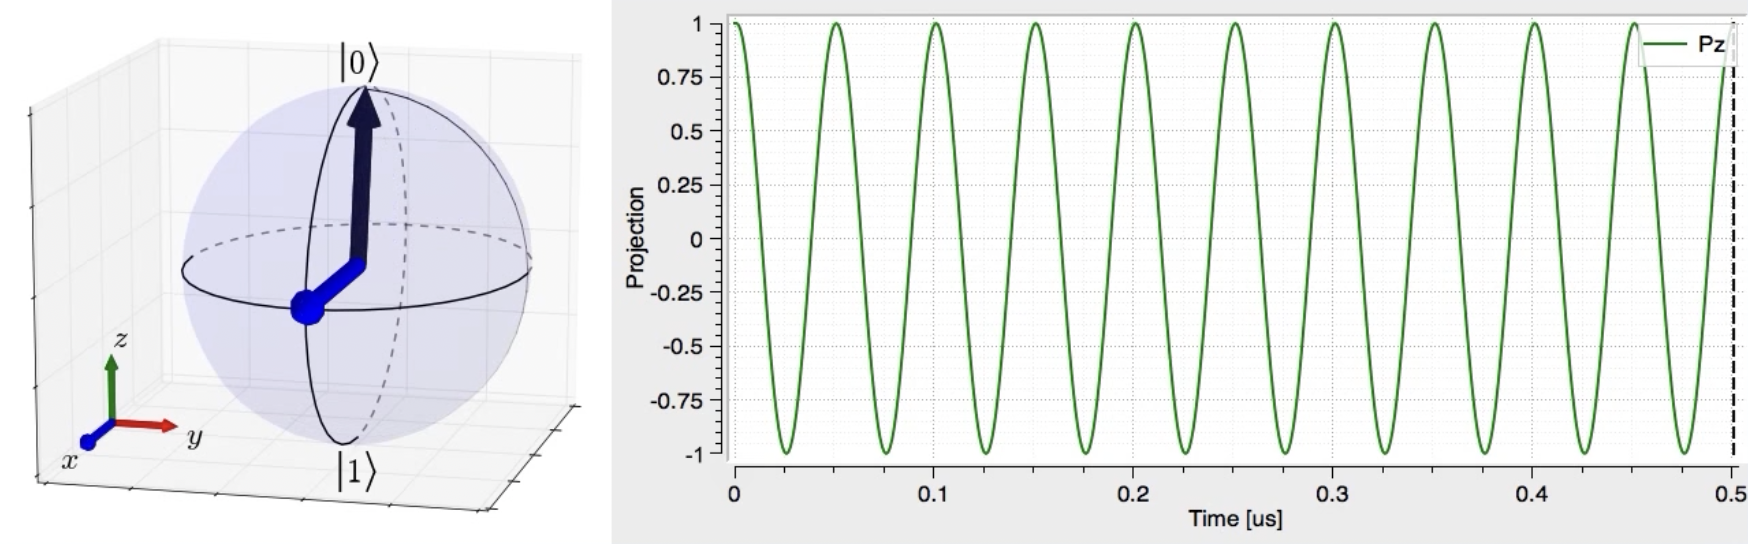

<div align="center">
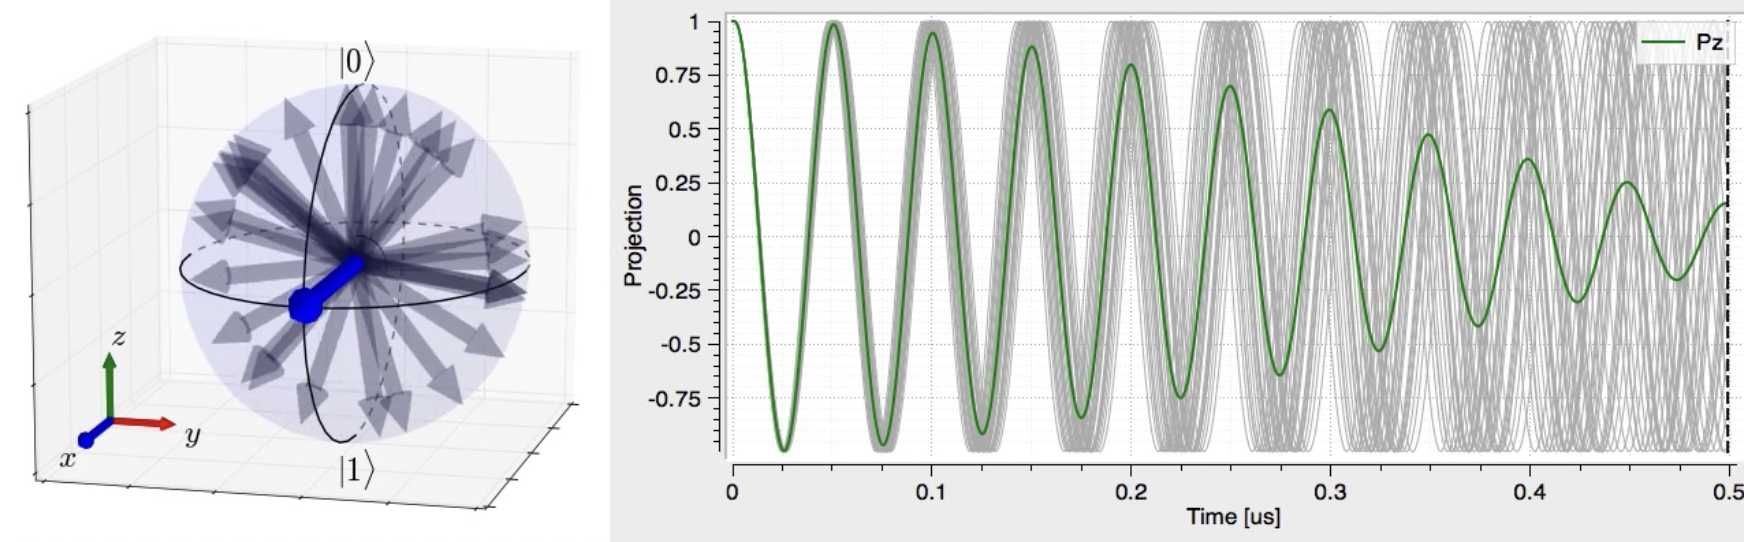

<a id="5.1"></a>
## 5.1. Mitigación de errores

La mitigación de errores es una técnica utilizada en computación cuántica para reducir el impacto de los errores sin necesidad de la redundancia de qubits o sobrecarga significativa en la computación. A diferencia de la corrección de errores, la mitigación de errores no intenta corregir los errores directamente, sino que busca minimizar su efecto en los resultados finales. Algunas de las estrategias más comunes para la mitigación de errores incluyen:

1. **Filtrado de resultados**: Se pueden aplicar filtros para eliminar mediciones que claramente han sido afectadas por errores.
2. **Extrapolación a ruido cero**: Este método implica ejecutar el mismo circuito cuántico con diferentes niveles de ruido (controlando parámetros como el tiempo de ejecución) y extrapolar los resultados a un escenario con ruido cero.
3. **Corrección basada en modelos**: Consiste en construir modelos del comportamiento del ruido en el hardware y usar estos modelos para ajustar los resultados medidos.
4. **Descomposición de operaciones**: Dividir operaciones cuánticas en sub-operaciones menos ruidosas y combinar los resultados para obtener una salida menos ruidosa.
5. **Averaging (promediado)**: Realizar múltiples ejecuciones del circuito y promediar los resultados para reducir el impacto de fluctuaciones aleatorias.

<a id="5.2"></a>
## 5.2. Corrección de errores

La corrección de errores cuánticos es un conjunto de técnicas más robusto y complejo que tiene como objetivo detectar y corregir los errores en qubits durante la computación cuántica. A diferencia de la mitigación de errores, la corrección de errores añade redundancia al sistema cuántico, utilizando múltiples qubits para proteger la información. Los principios y técnicas fundamentales incluyen:

1. **Codificación de la información**: Utilizar más de un qubit para representar un único qubit lógico. Por ejemplo, en el [código de Shor](https://errorcorrectionzoo.org/c/shor_nine), se utilizan 9 qubits físicos para representar 1 qubit lógico.
2. **Síndromes de error**: Medir síndromes de error que indican qué tipo de error ha ocurrido sin colapsar el estado cuántico. Esta información se utiliza para inferir y corregir el error.
3. **Códigos cuánticos**: Existen diversos códigos cuánticos, como el Código de Shor, el Código de Steane y los códigos CSS (Calderbank-Shor-Steane), cada uno con diferentes capacidades para detectar y corregir errores.
4. **Operaciones correctivas**: Una vez identificado el error, se aplican operaciones correctivas para devolver el qubit a su estado original.

La corrección de errores es esencial para la computación cuántica a gran escala porque los qubits son extremadamente susceptibles al ruido y a los errores operacionales. Implementar estas técnicas requiere un número significativo de qubits físicos, lo que actualmente representa un desafío debido a las limitaciones tecnológicas y la coherencia temporal de los qubits.

Para una lista más exhaustiva de algoritmos de corrección de errores (clásicos y cuánticos) visitar el [Error Correction Zoo](https://errorcorrectionzoo.org/).

<a id="5.3"></a>
## 5.3. Diferencias

- **Objetivo**: La mitigación de errores busca reducir el impacto de los errores en los resultados sin necesidad de corregirlos directamente, mientras que la corrección de errores busca identificar y corregir activamente los errores.
- **Complejidad**: La mitigación de errores suele ser menos compleja y requiere menos recursos adicionales en comparación con la corrección de errores, que implica redundancia significativa y operaciones adicionales.
- **Uso de qubits**: La mitigación de errores no necesariamente aumenta el número de qubits necesarios, mientras que la corrección de errores requiere un número mucho mayor de qubits para representar y proteger la información.

Ambas estrategias son complementarias y pueden utilizarse en conjunto para mejorar la precisión y la fiabilidad de los cálculos cuánticos.

<a id="6"></a>
# 6. Ejemplos en las SpinQ

SpinQ provee su propio framewrok de programación llamado **SpinQit** y puede ser instalado con

```
    pip install spinqit
```

Cabe destacar que necesita **Python 3.8** para funcionar, por lo que se recomienda crear el ambiente de conda particular

```
    conda create -n spinqit1 python=3.8
```

_Nota_: Qiskit 1.2 también funciona en Python 3.8, así que es posible tener ambos frameworks en el mismo ambiente. Se recomiendan ambientes separados.

<a id="6.1"></a>
## 6.1. Simulación con SpinQit

El código de `spinqit` funciona bajo los mismo proncipios de lo que hemos visto, solo cambia un poco su sintaxis, a continuación tenemos tres códigos de ejemplo:

#### Ejemplo 1: Cambio de estado

1 qubit</br>
Compuerta: `X` 

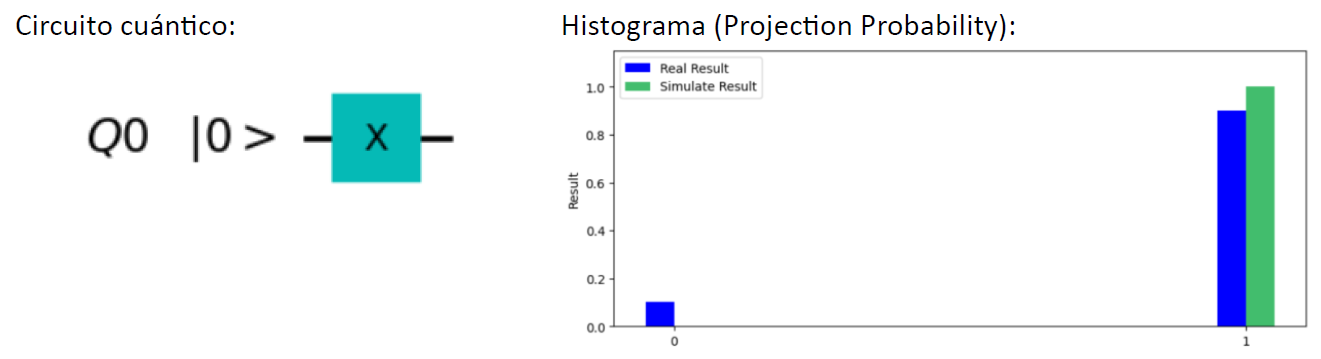

In [37]:
# Creación del circuito

from spinqit import Circuit
from spinqit import X
from spinqit.utils import print_circuit


circ_x = Circuit()
q = circ_x.allocateQubits(1)
circ_x << (X, q[0])

print(print_circuit(circ_x))
print()

[Instruction(gate:X, qubits:[0], clbits:[], params:[])]



{'1': 1024}
{'1': 1.0}
[0j, (1+0j)]



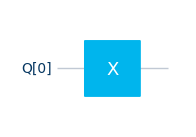

In [38]:
# Simulación del circuito

from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import draw

# Compilador y backend
comp = get_compiler("native")                       # otros compiladores: 'qasm' y 'qiskit'
engine = get_basic_simulator()

# Compilar
optimization_level = 0
exe = comp.compile(circ_x, optimization_level)
draw(exe)                                           # una vez compilado, se puede dibujar el circuito

# Ejecutar
config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

# Resultados
print(result.counts)
print(result.probabilities)
print(result.states)
print()

Alternativamente, se puede crear un `QuantumCircuit` y agregar compuertas como lo hacemos con Qiskit:

```
from spinqit.qiskit.circuit import QuantumCircuit

qc = QuantumCircuit(2)
qc.x(0)
qc.rx(pi, 0)
qc.cx(0, 1)
```


#### Ejemplo 2: Superposición con 1 qubit

1 qubit</br>
Compuerta: `H` 

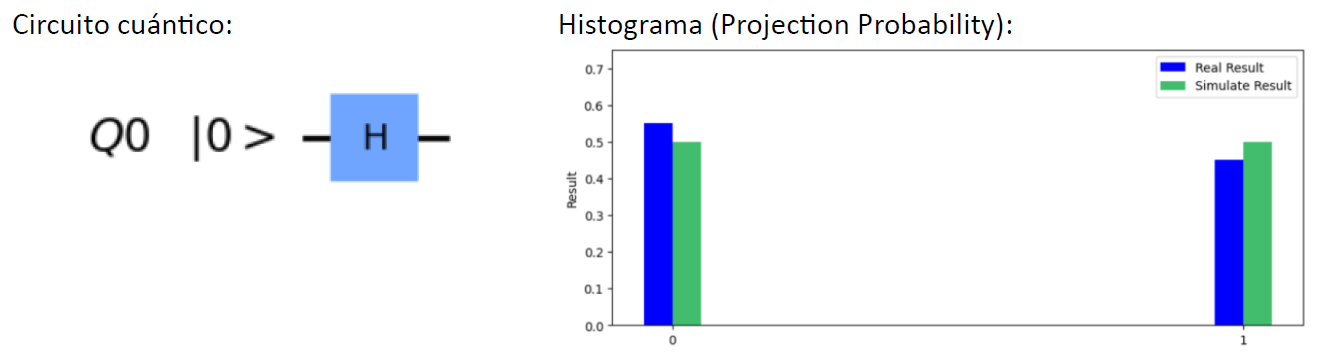

[Instruction(gate:H, qubits:[0], clbits:[], params:[])]

{'0': 512, '1': 512}
{'0': 0.4999999999809753, '1': 0.4999999999809753}
[(0.7071067811865476+0j), (0.7071067811865476+0j)]



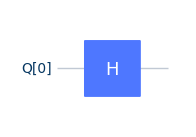

In [39]:
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import Circuit, H, draw
from spinqit.utils import print_circuit


circ_h = Circuit()
q = circ_h.allocateQubits(1)
circ_h << (H, q[0])

print(print_circuit(circ_h))
print()

comp = get_compiler()               # si no hay parámetro, entonces es el 'native'
engine = get_basic_simulator()

exe = comp.compile(circ_h, 0)
draw(exe)

config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

print(result.counts)
print(result.probabilities)
print(result.states)
print()

#### Ejemplo 3: Superposición con 2 qubits

2 qubits</br>
Compuertas: `H` $\otimes$ `H`

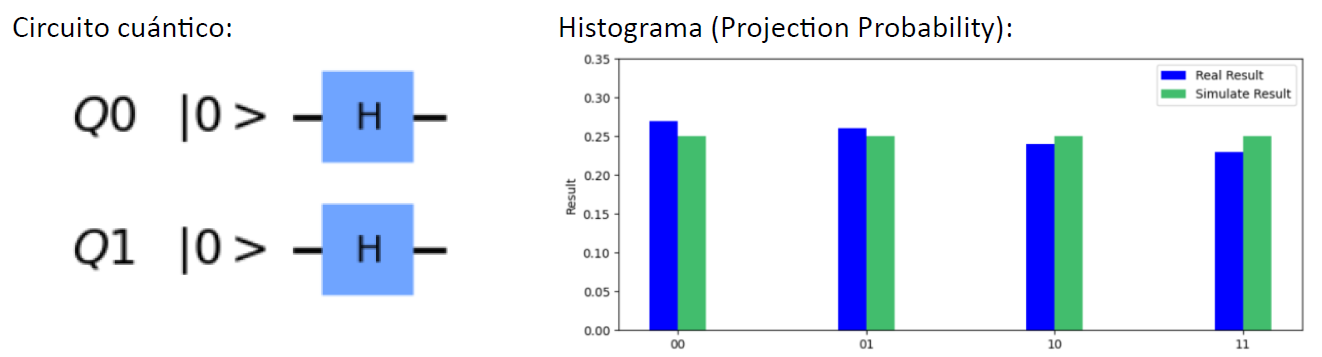

[Instruction(gate:H, qubits:[0], clbits:[], params:[]), Instruction(gate:H, qubits:[1], clbits:[], params:[])]

{'00': 256, '01': 256, '10': 256, '11': 256}
{'00': 0.24999999998097527, '01': 0.24999999998097527, '10': 0.24999999998097527, '11': 0.24999999998097527}
[(0.5+0j), (0.5+0j), (0.5+0j), (0.5+0j)]



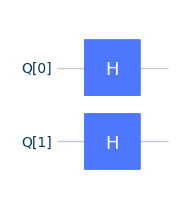

In [40]:
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import Circuit, H, draw
from spinqit.utils import print_circuit


circ_hh = Circuit()
q = circ_hh.allocateQubits(2)              # ahora son 2 qubits
circ_hh << (H, q[0])
circ_hh << (H, q[1])

print(print_circuit(circ_hh))
print()

comp = get_compiler()
engine = get_basic_simulator()

exe = comp.compile(circ_hh, 0)
draw(exe)

config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

print(result.counts)
print(result.probabilities)
print(result.states)
print()

<a id="6.2"></a>
## 6.2. Ejecución en las SpinQ

Para enviar el código a las computadoras QpinQ y que se ejecute en ese hardware cuántico, es necesario utilizar el _backend_ adecuado y la información de conexión pertinente:

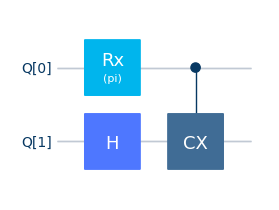

In [41]:
from spinqit import Circuit
from spinqit import get_nmr, get_compiler, NMRConfig
from spinqit import H, CX, Rx, draw
from math import pi


quit()
q = circ.allocateQubits(2)
circ << (Rx, q[0], pi)
circ << (H, q[1])
circ << (CX, (q[0], q[1]))

comp = get_compiler()
engine = get_nmr()                                   # el backend es el hardware cuántico

exe = comp.compile(circ, 0)
draw(exe)

config = NMRConfig()                                 # la configuración es de tipo NMR (para el hardware cuántico)
config.configure_shots(1024)
config.configure_ip("192.168.30.32")                 # 192.168.30.33   <- la IP cambia cada vez
config.configure_port(8989)
config.configure_account("SpinQ001", "123456")       # usuario, password
config.configure_task("UNAM_<tu_nombre>", "lab2")    # nombre, descripción

result = engine.execute(exe, config)

print(result.counts)
print(result.probabilities)
print(result.states)

<a id="7"></a>
# 7. Práctica 2

La Tarea deberá ser entregada en un Jupyter notebook, debe ser uno nuevo (no se puede usar este), el archivo debe ser subido al Google Classroom.

1. Implementa el siguiente circuito cuántico con Qiskit y simúlalo. Recuerda que, por defecto, el estado inicial es $\ket{000}$, ¿cuál es el estado final? (mide los 3 qubits). El objetivo es averiguar qué hace el circuito cuántico.

<center>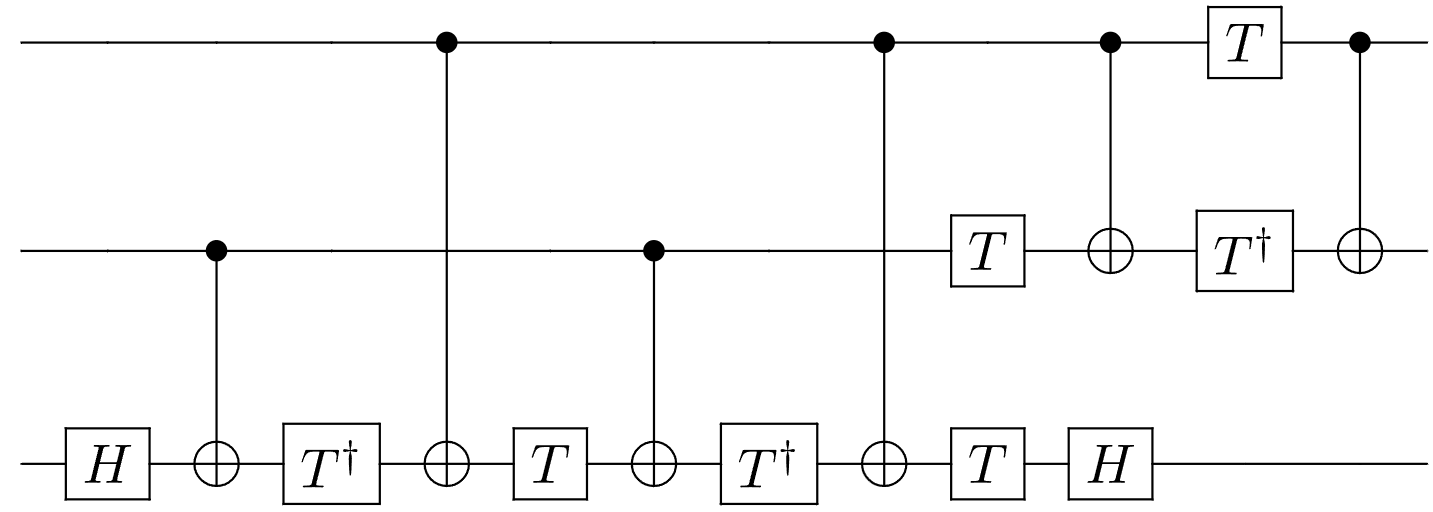

Para saber lo que hace el circuito es muy útil hacer una tabla de verdad:

|q2|q1|q0|$\rightarrow$|q2|q1|q0|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|0|0|0|$\rightarrow$|?|?|?|
|0|0|1|$\rightarrow$| | | |
|0|1|0|$\rightarrow$| | | |
|0|1|1|$\rightarrow$| | | |
|1|0|0|$\rightarrow$| | | |
|1|0|1|$\rightarrow$| | | |
|1|1|0|$\rightarrow$| | | |
|1|1|1|$\rightarrow$| | | |

Donde $q2,q1,q0$ de la **izquierda** son los estados iniciales (antes de las compuertas) y los $q2,q1,q0$ de la **derecha** son los estados finales (después de las compuertas).

<br>

- Cumple con los siguientes puntos:
    - Cambia el estado inicial (aplicando compuertas $X$ en cada qubit, y la combinación de estas) para cubrir todas las posibilidades del lado izquiero de la tabla de verdad ($q2,q1,q0$), es decir, los $2^3=8$ posibles estados iniciales.
        - Recuerda que $q0$ es el qubit de hasta arriba en el circuito (orden de Qiskit).
    - Simulación del circuito usando la clase `BasicSimulator` o la clase `StatevectorSampler` (como en los ejemplos anteriores).
        - Mostrar los histogramas.
        - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
    - Rellena toda la tabla (en markdown) con los resultados que obtengas de la medición al iniciar el circuito con cada estado posible.
        - Puedes usar un método de Python para que no tengas que repetir el mismo código tantas veces.
    - ¿Qué crees que hace este circuito?
        - Escribe tus conclusiones en una celda de markdown.
    

<br/>

2. Implementa la compuerta $SWAP$ pero utilizando su equivalencia de tres compuertas de 2 qubits (tercer diagrama en [esta referencia](https://pennylane.ai/qml/glossary/what-is-a-swap-gate/)) en código de `spinqit`.
    1. Escribe el código en `spinqit` como los ejemplos anteriores.
    2. Realiza la silumación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
        - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
    3. Debes mostrar los resultados de este ejercicio 2 en el mismo notebook en el que están los resultados del ejercicio 1.
        - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
        - Luego abrir el notebook de nuevo en el segundo ambiente y realizar este ejercicio 2 en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.

<br/>

3. **[Opcional]** Implementa el siguiente circuito cuántico con Qiskit y simúlalo. ¿Qué crees que hace este circuito?

<center>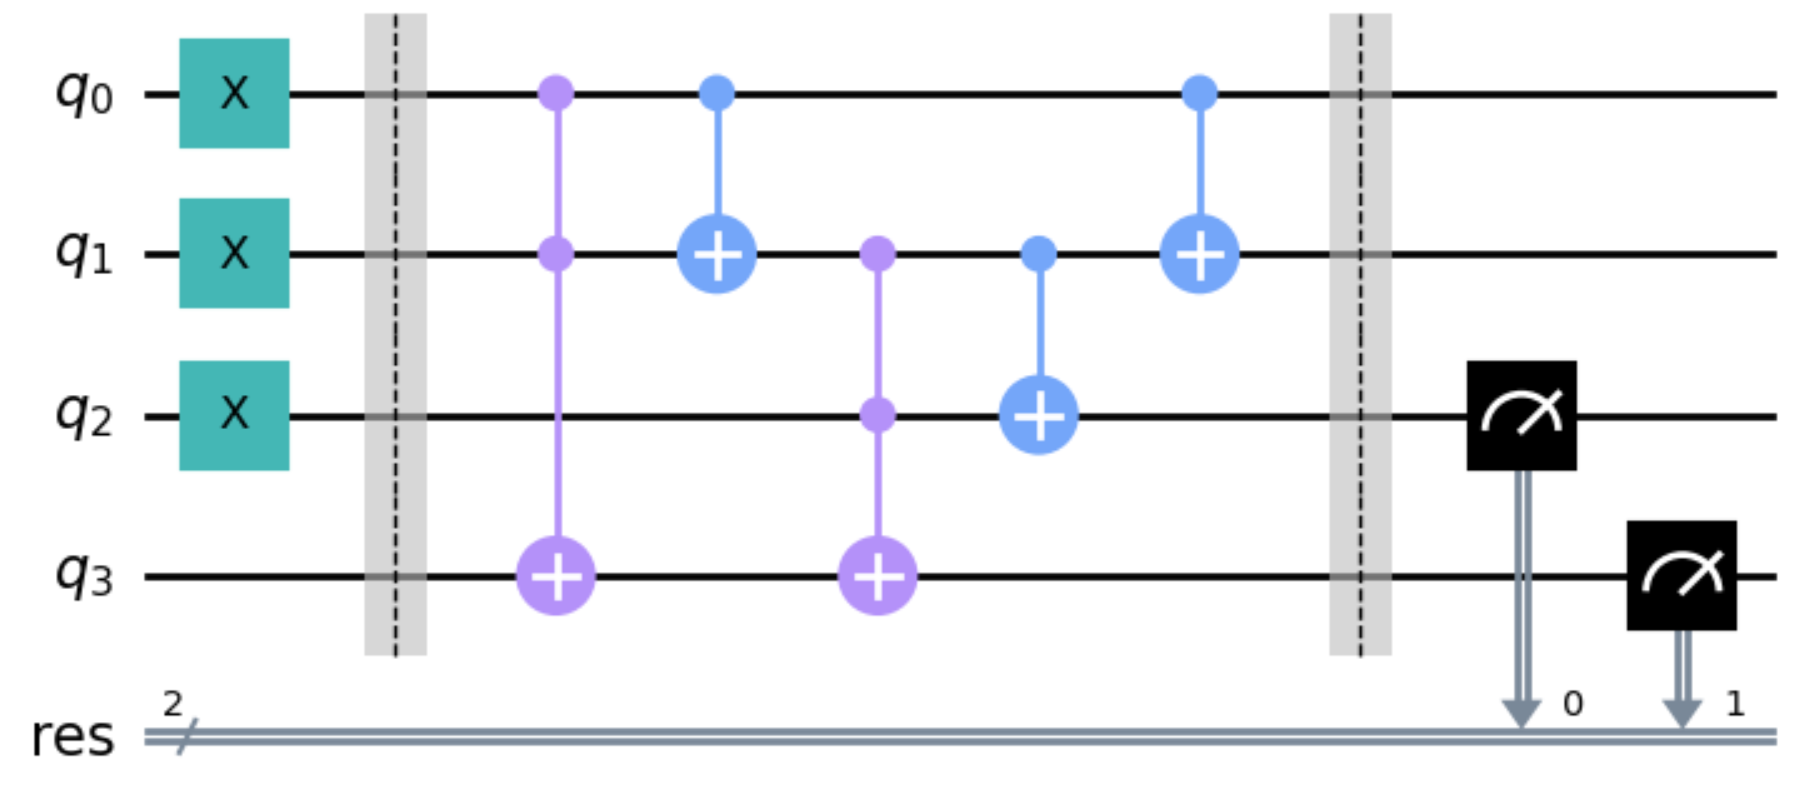

- Las barreras (líneas verticales grises) se agregan con `circuito.barrier()`.
- Implementa el circuito usando Qiskit.
- Las compuertas $X$ antes de la primer barrera son un ejemplo de inicialización del estado, en este caso se está iniciando en $\ket{0111}$ (recuerda el orden de Qiskit).
- Recuerda simular el circuito con los diferentes estados iniciales posibles, como en los ejemplos de este notebook (no uso de Qiskit Aer).
- En una celda de markdown describe lo que crees que hace este circuito cuántico.
    - Considera usar una tabla de verdad para averiguar lo que hace.

<br/>

**Nota**: Los ejercicios opcionales sumarán punto(s) extra en el total de tareas, sino se realizan **no** restarán puntos al total de tareas.

**Nota**: Tarea individual.